In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [2]:
display(HTML("<style>.container { width:100% !important; }</style>"))

### RAPTOR stands for “Robust Algorithm (using) Player Tracking (and) On/Off Ratings” and measures the number of points a player contributes to team offense and team defense per 100 possessions, relative to a league-average player.

In [3]:
CollegePlayers_2009_2021= pd.read_csv('CollegeBasketballPlayers2009-2021 copy.csv')
#reading data set containing college statistics for male college basketball players between 2009 to 2021

/Users/justinlapidus/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
College_Players_2022= pd.read_csv('CollegeBasketballPlayers2022.csv')
#reading data set containing college statistics for male college basketball players in 2022

In [5]:
RAPTOR_Scores=pd.read_csv('historical_RAPTOR_by_player.csv')
RAPTOR_Scores= RAPTOR_Scores[RAPTOR_Scores['season'] >= 2009] #Dropping any season before 2009
#reading data set containing RAPTOR Scores for players from the 2009 to 2022 season. 


In [6]:
Season_stats= pd.read_csv('Seasons_Stats.csv')

Season_Stats= Season_stats.drop_duplicates(subset=['Player', 'Year']) #dropping duplicate player names to elinimate the cases of midseason trades

season_stats = Season_Stats[Season_Stats['Year'].between(2009, 2019)]# Only including season stats between 2009 to 2019




In [7]:
Player_data= pd.read_csv('player_data.csv')

player_data = Player_data[Player_data['year_end'] >= 2009]


In [8]:
DraftedPlayers= pd.read_csv('NBA Draft.csv')

#DraftedPlayers= DraftedPlayers[DraftedPlayers['Year'] >= 2009]
DraftedPlayers['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

## Data Cleaning

In [9]:
Raptor_and_season = pd.merge(season_stats, RAPTOR_Scores, left_on=['Player', 'Year'], right_on=['player_name', 'season'], how='left')#merging the two datasets to create one dataset with the raptor score and season stats
Raptor_and_season.drop(['player_name', 'player_id', 'season'], axis=1, inplace=True)
Raptor_and_seasons= Raptor_and_season.drop(columns=['Age',"Tm",'G','3PAr','blanl','blank2','OBPM','DBPM','BPM','VORP','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','war_total','war_reg_season','war_playoffs','predator_offense','predator_defense','predator_total','pace_impact'])
Raptor_and_seasons1= Raptor_and_seasons.dropna()


In [50]:
Raptor_and_seasons1

,Unnamed: 0,Year,Player,Pos,GS,MP,PER,TS%,FTr,OWS,...,STL,BLK,TOV,PF,PTS,poss,mp,raptor_offense,raptor_defense,raptor_total
0,19339,2009.0,Alex Acker,SG,0.0,199.0,10.4,0.448,0.132,-0.1,...,5.0,4.0,7.0,9.0,72.0,384.0,199.0,-1.919406,-1.148910,-3.068316
2,19343,2009.0,Arron Afflalo,SG,8.0,1234.0,8.9,0.548,0.237,0.8,...,28.0,13.0,43.0,144.0,363.0,2371.0,1300.0,-1.077159,-0.714294,-1.791453
3,19344,2009.0,Maurice Ager,SG,0.0,97.0,2.2,0.365,0.186,-0.3,...,1.0,2.0,4.0,17.0,34.0,184.0,97.0,-5.613656,-2.194439,-7.808095
4,19345,2009.0,Blake Ahearn,PG,0.0,19.0,12.9,0.581,0.333,0.0,...,1.0,0.0,1.0,3.0,8.0,35.0,19.0,0.058885,0.145418,0.204304
5,19346,2009.0,Alexis Ajinca,PF,4.0,182.0,7.0,0.430,0.406,-0.3,...,7.0,6.0,12.0,34.0,70.0,339.0,182.0,-5.529796,0.334704,-5.195092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,24685,2017.0,Thaddeus Young,PF,74.0,2237.0,14.9,0.562,0.125,1.9,...,114.0,30.0,96.0,135.0,814.0,4850.0,2377.0,-1.109140,2.294395,1.185255
4216,24686,2017.0,Cody Zeller,PF,58.0,1725.0,16.7,0.604,0.442,3.4,...,62.0,58.0,65.0,189.0,639.0,3460.0,1725.0,-1.576324,1.384167,-0.192157
4217,24687,2017.0,Tyler Zeller,C,5.0,525.0,13.0,0.508,0.247,0.5,...,7.0,21.0,20.0,61.0,178.0,1249.0,603.0,-3.010896,1.070227,-1.940668
4219,24689,2017.0,Paul Zipser,SF,18.0,843.0,6.9,0.503,0.181,-0.3,...,15.0,16.0,40.0,78.0,240.0,1970.0,979.0,-2.152280,-1.265658,-3.417939


##### The data included players whose final years were in 2009, or was drafted before 2008. These players needed to be dropped. In order to do this the list of names had to be searched manually

In [51]:
#Players_to_drop= ['Andre Iguodala', 'Andrei Kirilenko', 'Andres Nociono','Zaza Pachulia','Demetrius Jackson', 'James Southerland','Antawn Jamison', 'Anthony Johnson', 'Anthony Roberson', 'Austin Croshere', 'Ben Gordon', 'Beno Udrih', 'Bobby Jackson', 'Boris Diaw', 'Brandan Wright', 'Brian Cook', 'Brian Skinner', 'Carmelo Anthony', 'Channing Frye', 'Charlie Villanueva', 'Cheikh Samb', 'Chris Bosh', 'Chris Kaman', 'Chris Paul', 'Chris Quinn', 'Corey Brewer', 'Corey Maggette', 'Cuttino Mobley', 'Damien Wilkens', 'Andrea Bargnani', 'Andre Miller', 'Andris Biedrins', 'Anthony Carter', 'Anthony Parker', 'Antoine Wright', 'Baron Davis', 'Ben Wallace', 'Blake Ahearn', 'Bobby Simmons', 'Brad Miller', 'Brandon Bass', 'Brandon Roy', 'Brian Scalabrine', 'C.J. Watson', 'Caron Butler', 'Charlie Bell', 'Chauncey Billups', 'Chris Andersen', 'Chris Duhon', 'Chris Hunter', 'Chris Wilcox', 'Chuck Hayes', 'Chucky Atkins', 'Craig Smith', 'Dahntay Jones', 'Daniel Gibson', 'Danny Granger', 'Darius Miles', 'Darnell Jackson', 'David Lee', 'Darius Songaila', 'Darko Milicic', 'Darell Arthur', 'David West', 'Lou Williams', 'Lindsey Hunter', 'LeBron James', 'Lamar Odom', 'Kyle Lowry', 'Kurt Thomas', 'Kirk Hinrich', 'Kevin Ollie', 'Kevin Garnett', 'Kendrick Perkins', 'Kalenna Azubuike', 'Juan Dixon', 'Josh Powell', 'Jose Calderon', 'John Salmons', 'Joel Przybilla', 'Joe Johnson', 'Jerry Stackhouse', 'Jeff Ayres', 'Jeff Foster', 'Jason Terry', 'Jason Maxiell', 'Jason Kapono', 'Jarret Jack', 'Jared Jeffries', 'James Posey', 'Linas Kleiza', 'Leandro Barbosa', 'Larry Hughes', 'LaMarcus Aldridge', 'Kyle Korver', 'Kobe Bryant', 'Keyon Dooling', 'Kevin Martin', 'Kenyon Martin', 'Keith Bogans', 'Kareem Rush', 'Josh Smith', 'Josh Howard', 'Jordan Farmar', 'Johan Petro', 'Joey Graham', 'Joe Smith', 'Jermaine O\'Neal', 'Jeremy Richardson', 'Javaris Crittenton', 'Jason Richardson', 'Jason Kidd', 'Jason Hart', 'Jarvis Hayes', 'James Singleton', 'James Jones', 'Jameer Nelson', 'Jamal Crawford', 'J.J. Barea', 'Ike Diogu', 'Hedo Turkoglu', 'Greg Buckner', 'Gilbert Arenas', 'Gerald Wallace', 'Francisco Garcia', 'Fabricio Oberto', 'Eddie House', 'Earl Boykins', 'Drew Gooden', 'Donyell Marshall', 'Dirk Nowitzki', 'Devin Harris', 'Devean George', 'DeShawn Stevenson', 'Al Jefferson', 'Alex Acker', 'Anderson Varejao', 'Jamario Moon', 'Jacques Vaughn', 'Ime Udoka', 'Hilton Armstrong', 'Hakim Warrick', 'Grant Hill', 'Gerald Green', 'Fred Jones', 'Francisco Elson', 'Eduardo Najera', 'Earl Watson', 'Dwyane Wade', 'Dontell Jefferson', 'Didier Ilunga-Mbenga', 'Devin Brown', 'Desmond Mason', 'Deron Williams', 'Demetris Nichols', 'Dee Brown', 'Adam Morrison', 'Al Harrington', 'Amar\'e Stoudemire', 'Andray Blatche', 'Rafer Alston', 'Quinton Ross', 'Quincy Douby', 'Pau Gasol', 'Patrick O\'Bryant', 'Pablo Prigioni', 'Nick Collison', 'Mustafa Shakur', 'Mo Williams', 'Mike Wilks', 'Mike James', 'Mickael Pietrus', 'Michael Finley', 'Maurice Evans', 'Matt Carroll', 'Matt Bonner', 'Martell Webster', 'Marko Jaric', 'Mardy Collins', 'Marcus Camby', 'Marcin Gortat', 'Malik Rose', 'Maceo Baston', 'Luther Head', 'Luke Ridnour', 'Quentin Richardson', 'Peja Stojakovic', 'Paul Pierce', 'Paul Millsap', 'Patrick Ewing', 'Oleksiy Pecherov', 'Nate Robinson', 'Morris Peterson', 'Monta Ellis', 'Mike Miller', 'Mike Dunleavy', 'Mike Bibby', 'Michael Redd', 'Mehmet Okur', 'Maurice Ager', 'Matt Barnes', 'Marvin Williams', 'Marquis Daniels', 'Mark Blount', 'Marcus Williams', 'Marcus Banks', 'Manu Ginobili', 'Malik Allen', 'Luol Deng', 'Luke Walton', 'Luis Scola', 'Thaddeus Young', 'Thabo Sefolosha', 'Tayshaun Prince', 'Tarence Kinsey', 'Taj Gibson', 'Stephen Jackson', 'Solomon Jones', 'Shawne Williams', 'Shavlik Randolph', 'Shane Battier', 'Sebastian Telfair', 'Sasha Vujacic', 'Sasha Pavlovic', 'Ryan Gomes', 'Royal Ivey', 'Ronnie Price', 'Ronald Murray', 'Ricky Davis', 'Richard Jefferson', 'Renaldo Balkman', 'Raymond Felton', 'Rasheed Wallace', 'Rashad McCants', 'Rajon Rondo', 'T.J. Ford', 'Stromile Swift', 'Steve Novak', 'Steve Nash', 'Stephen Graham', 'Shelden Williams', 'Shawn Marion', 'Shannon Brown', 'Sergio Rodriguez', 'Sean Williams', 'Sean May', 'Samuel Dalembert', 'Rudy Gay', 'Ronny Turiaf', 'Roko Ukic', 'Rodney Carney', 'Richard Hamilton', 'Reggie Evans', 'Ray Allen', 'Rasho Nesterovic', 'Rashard Lewis', 'Randy Foye', 'Raja Bell', 'Tracy McGrady', 'Travis Diener', 'Wally Szczerbiak', 'Walter Herrmann', 'Vince Carter', 'Von Wafer', 'Vladimir Radmanovic', 'Tony Parker', 'Travis Outlaw', 'Trenton Hassell', 'Udonis Haslem', 'Tyson Chandler', 'Tyronn Lue', 'Tyrus Thomas', 'Troy Murphy', 'Tony Battie', 'Tony Allen', 'Tim Thomas', 'Trevor Ariza', 'Timofey Mozgov', 'Tim Duncan', 'Thomas Gardner']

#Raptor_and_seasons2 = Raptor_and_seasons1[~Raptor_and_seasons1['Player'].isin(Players_to_drop)]
Raptor_and_seasons2 = Raptor_and_seasons1.groupby('Player').head(3).groupby('Player').mean()



###### Removing any college statistics for players that did not play between 2009 to 2019. This was needed in order to predict upon the class of 2020, 2021,2022, and 2023


In [11]:
college_stats = pd.concat([College_Players_2022, CollegePlayers_2009_2021])

college_stats1= college_stats[college_stats['year'].between(2019, 2022)] 

college_stats_2009_2019 = CollegePlayers_2009_2021[CollegePlayers_2009_2021['year'].between(2009, 2019)] #Only taking the college statistics for players from 2009 to 2019 in order to predict upon the class of 20, 21, 22, and 23





In [12]:
college_stats_2009_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51358 entries, 0 to 51357
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      51358 non-null  object 
 1   team                             51358 non-null  object 
 2   conf                             51358 non-null  object 
 3   GP                               51358 non-null  int64  
 4   Min_per                          51358 non-null  float64
 5   Ortg                             51358 non-null  float64
 6   usg                              51358 non-null  float64
 7   eFG                              51358 non-null  float64
 8   TS_per                           51358 non-null  float64
 9   ORB_per                          51358 non-null  float64
 10  DRB_per                          51358 non-null  float64
 11  AST_per                          51358 non-null  float64
 12  TO_per            

In [42]:
Drafted_college_stats =college_stats_2009_2019 #merging the two datasets on Player
Drafted_college_stats1= Drafted_college_stats.drop_duplicates(subset=['player_name']) #dropping any duplicate player names
Drafted_college_stats2= Drafted_college_stats1.set_index(['player_name']).sort_index()
Drafted_college_stats3 = Drafted_college_stats2.drop(columns=['dunksmade/(dunksmade+dunksmiss)', 'dunksmiss+dunksmade', 'dunksmade', 'Rec Rank', 'dporpag', 'stops', 'pick', 'ogbpm', 'type', 'pid', 'pfr', 'yr', 'adjoe', 'porpag', 'num', 'ht', 'midmade/(midmade+midmiss)', 'rimmade/(rimmade+rimmiss)', 'midmade+midmiss', 'midmade', 'rimmade+rimmiss', 'rimmade'])
Drafted_college_stats4 = Drafted_college_stats3.drop(columns=['Ortg', 'ORB_per', 'DRB_per', 'AST_per', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'drtg', 'adrtg', 'bpm', 'obpm', 'dbpm', 'gbpm', 'dgbpm'])

original_columns = ['Pick', 'Position', 'MP', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '2P%', '3P%', 'FT%', 'usg', 'eFG', 'TS_per', 'TO_per', 'FTM', 'FTA', 'year', 'ast/tov', 'mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'Unnamed: 64', 'Unnamed: 65']
Fixedcolumns = {col: f'NCAA{col}' for col in original_columns}

Drafted_college_stats5 = Drafted_college_stats4.rename(columns=Fixedcolumns)


Drafted_college_stats5




,team,conf,GP,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
player_name,,,,,,,,,,,,,,,,,,,,,
A'Torey Everett,Tennessee St.,OVC,23,19.0,15.7,40.5,50.08,30.6,18,23,...,9.7083,0.1250,0.7500,0.8750,0.7083,0.0833,0.0417,2.4167,Combo G,1.878270
A'Torri Shine,Grambling St.,SWAC,27,80.4,22.7,45.9,52.36,19.0,99,126,...,32.1481,1.3333,2.7778,4.1111,1.0741,0.4444,0.2593,13.2963,Wing G,5.841820
A'Uston Calhoun,Bowling Green,MAC,30,83.8,25.5,47.1,51.50,15.5,90,113,...,34.0667,2.2667,4.7667,7.0333,0.8000,0.3667,0.4667,15.2333,Wing F,3.286610
A'uston Calhoun,Bowling Green,MAC,1,0.3,20.0,50.0,50.63,0.0,1,2,...,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,Combo G,35.610000
A.C. Reid,Liberty,BSth,26,41.7,15.8,34.2,36.74,23.3,11,15,...,18.1034,0.2069,1.5517,1.7586,1.1034,0.3793,0.0690,3.9655,Combo G,11.677600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Talley Jr.,Iowa St.,B12,23,49.3,16.3,47.3,48.40,14.3,18,31,...,26.7826,0.9130,3.0870,4.0000,1.7391,0.5217,0.2609,7.5217,Wing G,2.330000
Zuri James,Georgia Southern,SC,27,56.6,13.5,48.2,51.03,22.2,19,23,...,24.5185,0.2963,1.1481,1.4444,1.1852,0.6296,0.0000,5.6296,Combo G,8.305170
Zvonko Buljan,TCU,MWC,30,66.9,27.8,53.7,56.53,24.6,62,86,...,27.0000,2.1000,5.8333,7.9333,1.8000,0.8667,0.2000,12.1667,NaN,6.056740


In [38]:
college_stats1['year']


0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
61056    2021
61057    2021
61058    2021
61059    2021
61060    2021
Name: year, Length: 18421, dtype: int64

.reset_index()

# Filter the DataFrame based on the years in 'years_to_include'
years_to_include = [2019, 2020, 2021, 2022]
Rookie_Test = Test_Drafted_college_stats8[Test_Drafted_college_stats8['Year'].isin(years_to_include)]


In [41]:
Test_Drafted_college_stats = college_stats1

# Check if the columns exist in the DataFrame before dropping them
columns_to_drop = ['player_name', 'Team', 'Age', 'College']
columns_to_drop = [col for col in columns_to_drop if col in Test_Drafted_college_stats.columns]

# Drop duplicates based on the 'player_name' column
Test_Drafted_college_stats1 = Test_Drafted_college_stats.drop_duplicates(subset=['player_name'])

# Set the index to 'player_name' and 'year', then sort the DataFrame
Test_Drafted_college_stats2 = Test_Drafted_college_stats1.set_index(['player_name', 'year']).sort_index()

# Fix 2
original_columns = ['MP', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FG%', '2P%', '3P%', 'FT%', 'usg', 'eFG', 'TS_per', 'TO_per', 'FTM', 'FTA', 'ast/tov', 'mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'Unnamed: 64', 'Unnamed: 65']
Fixedcolumns = {col: f'NCAA{col}' for col in original_columns}

# Fix 3
Test_Drafted_college_stats3 = Test_Drafted_college_stats2.drop(columns=['dunksmade/(dunksmade+dunksmiss)', 'dunksmiss+dunksmade', 'dunksmade', 'Rec Rank', 'dporpag', 'stops', 'pick', 'ogbpm', 'type', 'pid', 'pfr', 'yr', 'adjoe', 'porpag', 'num', 'ht', 'midmade/(midmade+midmiss)', 'rimmade/(rimmade+rimmiss)', 'midmade+midmiss', 'midmade', 'rimmade+rimmiss', 'rimmade'])
Test_Drafted_college_stats4 = Test_Drafted_college_stats3.drop(columns=['Ortg', 'ORB_per', 'DRB_per', 'AST_per', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'drtg', 'adrtg', 'bpm', 'obpm', 'dbpm', 'gbpm', 'dgbpm'])

# Rename the columns using the Fixedcolumns dictionary
Drafted_college_stats5 = Test_Drafted_college_stats4.rename(columns=Fixedcolumns)

# Reset the index to have 'player_name' and 'year' as columns again
Drafted_college_stats6 = Drafted_college_stats5.reset_index()

years_to_include = [2019, 2020, 2021, 2022]

# Filter the DataFrame based on the years in 'years_to_include'
Rookie_Test = Drafted_college_stats6[Drafted_college_stats6['year'].isin(years_to_include)]


Rookie_Test


,player_name,year,team,conf,GP,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
0,A.J. Banks,2019,Wyoming,MWC,31,58.5,13.9,55.9,59.87,27.0,...,23.7812,0.3125,2.5625,2.8750,1.5312,0.9375,0.4062,5.2188,Combo G,2.658040
1,A.J. Burch,2020,St. Francis PA,NEC,6,0.6,20.0,0.0,16.95,73.3,...,2.0000,0.0000,0.7143,0.7143,0.0000,0.0000,0.0000,0.2857,PF/C,0.000000
2,A.J. Caldwell,2022,Chattanooga,SC,24,80.2,11.4,52.7,51.94,17.2,...,32.6923,0.5000,4.2308,4.7308,2.5000,1.1538,0.3462,6.3846,Combo G,6.818230
3,A.J. Cheeseman,2019,Maryland Eastern Shore,MEAC,19,36.4,26.7,39.0,42.41,19.3,...,23.4500,1.1000,2.4000,3.5000,0.5500,0.8000,0.5000,8.8000,Wing F,1.881720
4,A.J. Frazier,2019,Xavier,BE,1,0.1,20.0,0.0,0.00,0.0,...,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,Zool Kueth,2022,Northern Illinois,MAC,18,51.0,14.4,55.9,56.67,12.6,...,21.6667,1.2222,1.6667,2.8889,0.5000,0.1667,0.7778,6.7222,Stretch 4,8.938630
8693,Zoran Talley Jr.,2019,Iowa St.,B12,21,11.2,12.0,61.3,61.29,18.6,...,7.4762,0.1905,0.8571,1.0476,0.4286,0.1429,0.1905,1.8095,PF/C,0.742437
8694,Zylan Cheatham,2019,Arizona St.,P12,34,79.6,21.3,55.4,57.81,24.1,...,32.2941,2.1471,8.1765,10.3235,3.1765,0.8235,0.7941,12.1176,PF/C,1.246590
8695,Zyon Dobbs,2020,James Madison,CAA,16,8.0,13.7,31.6,31.35,17.4,...,6.7647,0.1176,0.4706,0.5882,0.4706,0.5294,0.1176,1.3529,Combo G,5.376830


In [ ]:
Cleaned_Dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, Aaron Gordon to Zach LaVine
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       135 non-null    float64
 1   GS               135 non-null    float64
 2   MP               135 non-null    float64
 3   PER              135 non-null    float64
 4   TS%              135 non-null    float64
 5   FTr              135 non-null    float64
 6   OWS              135 non-null    float64
 7   DWS              135 non-null    float64
 8   WS               135 non-null    float64
 9   WS/48            135 non-null    float64
 10  FG               135 non-null    float64
 11  FGA              135 non-null    float64
 12  FG%              135 non-null    float64
 13  3P               135 non-null    float64
 14  3PA              135 non-null    float64
 15  3P%              135 non-null    float64
 16  2P               135 non-null    float64
 17  2P

In [52]:
Raptor_and_seasons3= Raptor_and_seasons2.reset_index()

Raptor_and_seasons3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          905 non-null    object 
 1   Unnamed: 0      905 non-null    float64
 2   Year            905 non-null    float64
 3   GS              905 non-null    float64
 4   MP              905 non-null    float64
 5   PER             905 non-null    float64
 6   TS%             905 non-null    float64
 7   FTr             905 non-null    float64
 8   OWS             905 non-null    float64
 9   DWS             905 non-null    float64
 10  WS              905 non-null    float64
 11  WS/48           905 non-null    float64
 12  FG              905 non-null    float64
 13  FGA             905 non-null    float64
 14  FG%             905 non-null    float64
 15  3P              905 non-null    float64
 16  3PA             905 non-null    float64
 17  3P%             905 non-null    flo

In [53]:


Cleaned_Dataframe = Raptor_and_seasons3.merge(Drafted_college_stats5, right_on='player_name', left_on='Player', how='left')
Cleaned_Dataframe1 = Cleaned_Dataframe



In [55]:
Cleaned_Dataframe1.dropna()

,Player,Unnamed: 0,Year,GS,MP,PER,TS%,FTr,OWS,DWS,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
1,Aaron Gordon,23690.666667,2016.0,39.0,1652.666667,14.266667,0.529333,0.292333,1.833333,1.533333,...,31.2368,2.6842,5.2895,7.9737,1.9737,0.8947,1.0263,12.3684,Wing F,2.350110
3,Aaron Harrison,24023.500000,2016.5,0.0,55.000000,1.050000,0.236500,0.566000,-0.150000,0.050000,...,32.5750,0.6250,2.3250,2.9500,1.8500,1.0750,0.3000,13.7250,Wing G,7.997210
6,Adonis Thomas,22787.000000,2014.0,1.0,37.000000,7.300000,0.485000,0.071000,0.000000,0.000000,...,23.9474,0.7368,2.4737,3.2105,0.7895,0.5789,0.7368,8.8421,Wing F,4.803520
7,Adreian Payne,23925.000000,2016.0,8.0,453.333333,9.233333,0.456667,0.246667,-0.533333,0.266667,...,9.0606,0.9394,1.4545,2.3939,0.1515,0.2727,0.8485,2.5758,C,0.202153
14,Alan Williams,24660.000000,2017.0,0.0,708.000000,19.500000,0.547000,0.419000,1.100000,0.900000,...,18.0000,3.3929,3.3214,6.7143,0.5357,0.5357,1.2857,7.2500,PF/C,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Xavier Henry,21346.000000,2012.0,6.0,637.000000,7.933333,0.460667,0.423000,-0.233333,0.400000,...,27.5000,1.1944,3.1667,4.3611,1.4722,1.5000,0.5000,13.4167,Wing G,9.149420
894,Xavier Munford,23908.000000,2016.0,0.0,244.000000,9.900000,0.481000,0.182000,-0.200000,0.200000,...,35.4138,0.2759,2.5517,2.8276,1.9310,1.0345,0.3448,17.3793,Combo G,12.161100
895,Xavier Silas,21560.000000,2012.0,0.0,39.000000,0.100000,0.337000,0.200000,-0.100000,0.000000,...,31.5600,1.4800,3.8000,5.2800,1.6400,0.8000,0.4800,19.7200,Wing G,11.633300
898,Yogi Ferrell,24259.000000,2017.0,29.0,1197.000000,13.100000,0.533000,0.226000,0.800000,1.000000,...,34.7143,0.9714,2.8286,3.8000,5.5714,1.0857,0.0286,17.3429,Scoring PG,8.937700


In [ ]:
Drafted_college_stats5

,team,conf,GP,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
player_name,,,,,,,,,,,,,,,,,,,,,
A'Torey Everett,Tennessee St.,OVC,23,19.0,15.7,40.5,50.08,30.6,18,23,...,9.7083,0.1250,0.7500,0.8750,0.7083,0.0833,0.0417,2.4167,Combo G,1.878270
A'Torri Shine,Grambling St.,SWAC,27,80.4,22.7,45.9,52.36,19.0,99,126,...,32.1481,1.3333,2.7778,4.1111,1.0741,0.4444,0.2593,13.2963,Wing G,5.841820
A'Uston Calhoun,Bowling Green,MAC,30,83.8,25.5,47.1,51.50,15.5,90,113,...,34.0667,2.2667,4.7667,7.0333,0.8000,0.3667,0.4667,15.2333,Wing F,3.286610
A'uston Calhoun,Bowling Green,MAC,1,0.3,20.0,50.0,50.63,0.0,1,2,...,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,Combo G,35.610000
A.C. Reid,Liberty,BSth,26,41.7,15.8,34.2,36.74,23.3,11,15,...,18.1034,0.2069,1.5517,1.7586,1.1034,0.3793,0.0690,3.9655,Combo G,11.677600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Talley Jr.,Iowa St.,B12,23,49.3,16.3,47.3,48.40,14.3,18,31,...,26.7826,0.9130,3.0870,4.0000,1.7391,0.5217,0.2609,7.5217,Wing G,2.330000
Zuri James,Georgia Southern,SC,27,56.6,13.5,48.2,51.03,22.2,19,23,...,24.5185,0.2963,1.1481,1.4444,1.1852,0.6296,0.0000,5.6296,Combo G,8.305170
Zvonko Buljan,TCU,MWC,30,66.9,27.8,53.7,56.53,24.6,62,86,...,27.0000,2.1000,5.8333,7.9333,1.8000,0.8667,0.2000,12.1667,NaN,6.056740


In [56]:
Cleaned_Dataframe2= Cleaned_Dataframe1.drop(columns=['Unnamed: 0', 'GS','MP','PER','TS%','OWS','DWS','WS','WS/48','FG','FG%','3P%','2P','2PA','FTr','FGA','3P','3PA','2P%','eFG%','FT','FTA','ORB','DRB','FT%','TRB','AST','STL','BLK','TOV','PF','PTS','poss','mp','raptor_offense','raptor_defense'])

In [57]:
top_25_raptor_totals = Cleaned_Dataframe.nlargest(25, 'raptor_total')

top_25_raptor_totals

,Player,Unnamed: 0,Year,GS,MP,PER,TS%,FTr,OWS,DWS,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
538,LeBron James,20210.000000,2010.0,78.666667,3027.666667,30.033333,0.596333,0.474667,12.433333,5.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,James Southerland,22765.000000,2014.0,0.000000,30.000000,11.800000,0.441000,0.133000,-0.100000,0.000000,...,7.4615,0.2308,1.0000,1.2308,0.3846,0.6154,0.5385,3.1538,Stretch 4,13.810300
144,Chris Paul,20347.333333,2010.0,67.666667,2531.333333,25.800000,0.587000,0.376667,9.500000,3.633333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Dwyane Wade,20468.333333,2010.0,77.333333,2887.666667,28.000000,0.572333,0.459667,8.966667,4.566667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,Nikola Jokic,24092.000000,2016.5,57.000000,1885.500000,23.950000,0.611000,0.292000,6.100000,2.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,Manu Ginobili,20129.000000,2010.0,35.666667,1919.000000,22.366667,0.586333,0.394333,5.266667,2.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Demetrius Jackson,24362.000000,2017.0,0.000000,17.000000,30.800000,0.753000,1.500000,0.100000,0.000000,...,22.2000,0.5000,1.6333,2.1333,1.8333,0.4000,0.0333,6.0333,Combo G,5.627310
262,Dwight Howard,20183.333333,2010.0,79.666667,2866.333333,25.166667,0.615333,0.907333,6.333333,7.466667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,Pierre Jackson,24363.000000,2017.0,1.000000,84.000000,13.000000,0.416000,0.179000,0.000000,0.100000,...,31.1081,0.8649,1.9730,2.8378,5.9189,1.8108,0.0811,13.9459,Pure PG,8.703170
742,Rudy Gobert,23683.500000,2016.0,59.000000,2451.000000,22.450000,0.654500,0.701000,6.650000,5.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
bottom_25_raptor_totals = Cleaned_Dataframe1.nsmallest(25, 'raptor_total')
bottom_25_raptor_totals1= bottom_25_raptor_totals.reset_index()


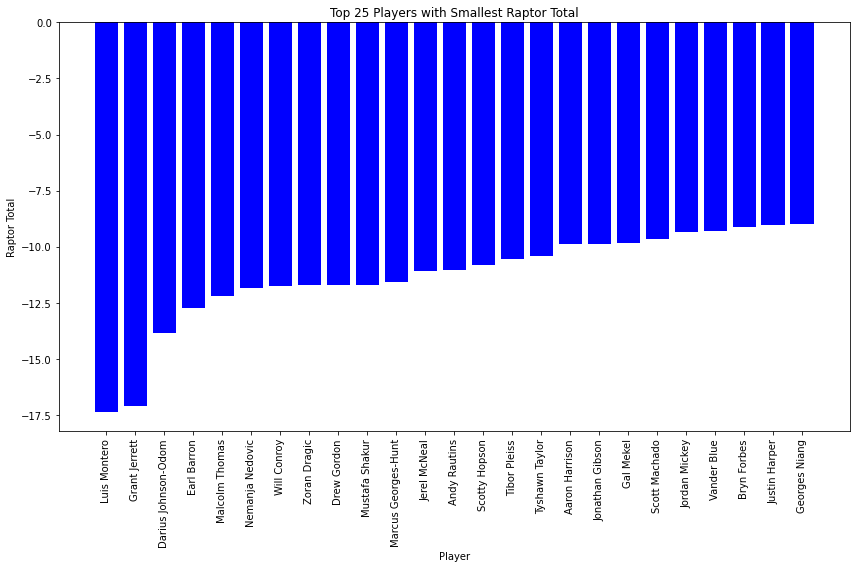

In [59]:


players = bottom_25_raptor_totals1['Player']
raptor_totals = bottom_25_raptor_totals1['raptor_total']

plt.figure(figsize=(12, 8))
plt.bar(players, raptor_totals, color='b')
plt.xlabel('Player')
plt.ylabel('Raptor Total')
plt.title('Top 25 Players with Smallest Raptor Total')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [60]:
top_25_raptor_totals1= top_25_raptor_totals.reset_index()


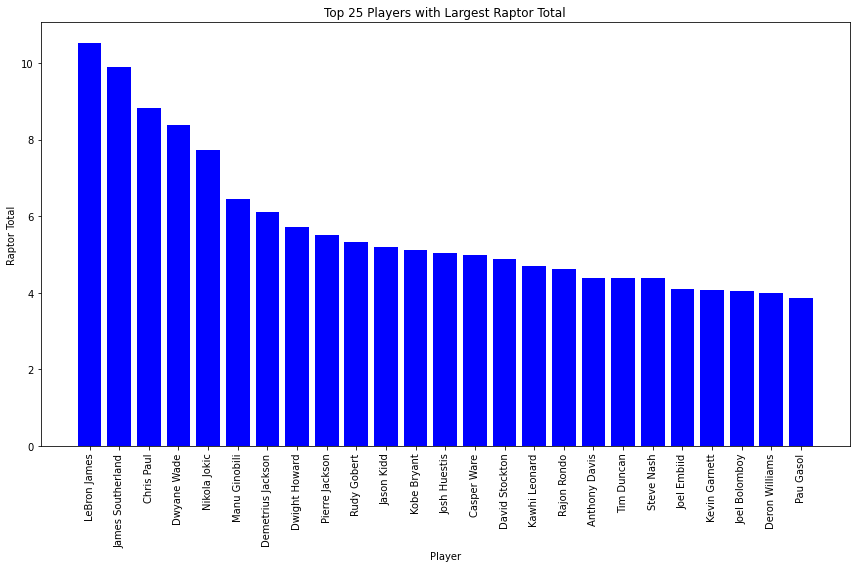

In [61]:
players = top_25_raptor_totals1['Player']
raptor_totals = top_25_raptor_totals1['raptor_total']


plt.figure(figsize=(12, 8))
plt.bar(players, raptor_totals, color='b')
plt.xlabel('Player')
plt.ylabel('Raptor Total')
plt.title('Top 25 Players with Largest Raptor Total')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [62]:
Cleaned_Dataframe3= Cleaned_Dataframe2.drop(columns=['NCAAUnnamed: 64','conf','team'])

In [63]:
Rookie_Test

,player_name,year,team,conf,GP,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,...,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 64,NCAAUnnamed: 65
0,A.J. Banks,2019,Wyoming,MWC,31,58.5,13.9,55.9,59.87,27.0,...,23.7812,0.3125,2.5625,2.8750,1.5312,0.9375,0.4062,5.2188,Combo G,2.658040
1,A.J. Burch,2020,St. Francis PA,NEC,6,0.6,20.0,0.0,16.95,73.3,...,2.0000,0.0000,0.7143,0.7143,0.0000,0.0000,0.0000,0.2857,PF/C,0.000000
2,A.J. Caldwell,2022,Chattanooga,SC,24,80.2,11.4,52.7,51.94,17.2,...,32.6923,0.5000,4.2308,4.7308,2.5000,1.1538,0.3462,6.3846,Combo G,6.818230
3,A.J. Cheeseman,2019,Maryland Eastern Shore,MEAC,19,36.4,26.7,39.0,42.41,19.3,...,23.4500,1.1000,2.4000,3.5000,0.5500,0.8000,0.5000,8.8000,Wing F,1.881720
4,A.J. Frazier,2019,Xavier,BE,1,0.1,20.0,0.0,0.00,0.0,...,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,Zool Kueth,2022,Northern Illinois,MAC,18,51.0,14.4,55.9,56.67,12.6,...,21.6667,1.2222,1.6667,2.8889,0.5000,0.1667,0.7778,6.7222,Stretch 4,8.938630
8693,Zoran Talley Jr.,2019,Iowa St.,B12,21,11.2,12.0,61.3,61.29,18.6,...,7.4762,0.1905,0.8571,1.0476,0.4286,0.1429,0.1905,1.8095,PF/C,0.742437
8694,Zylan Cheatham,2019,Arizona St.,P12,34,79.6,21.3,55.4,57.81,24.1,...,32.2941,2.1471,8.1765,10.3235,3.1765,0.8235,0.7941,12.1176,PF/C,1.246590
8695,Zyon Dobbs,2020,James Madison,CAA,16,8.0,13.7,31.6,31.35,17.4,...,6.7647,0.1176,0.4706,0.5882,0.4706,0.5294,0.1176,1.3529,Combo G,5.376830


In [95]:
y = Cleaned_Dataframe3["raptor_total"]
X = Cleaned_Dataframe3.drop("raptor_total", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train

231   -5.510641
894    0.299720
833   -1.694489
39    -0.615354
741    0.426175
         ...   
835   -7.727529
192   -2.824708
629   -0.006415
559   -3.043334
684   -5.964643
Name: raptor_total, Length: 678, dtype: float64

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 231 to 684
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           678 non-null    object 
 1   Year             678 non-null    float64
 2   GP               328 non-null    float64
 3   Min_per          328 non-null    float64
 4   NCAAusg          328 non-null    float64
 5   NCAAeFG          328 non-null    float64
 6   NCAATS_per       328 non-null    float64
 7   NCAATO_per       328 non-null    float64
 8   NCAAFTM          328 non-null    float64
 9   NCAAFTA          328 non-null    float64
 10  NCAAyear         328 non-null    float64
 11  NCAAast/tov      326 non-null    float64
 12  NCAAmp           328 non-null    float64
 13  NCAAoreb         328 non-null    float64
 14  NCAAdreb         328 non-null    float64
 15  NCAAtreb         328 non-null    float64
 16  NCAAast          328 non-null    float64
 17  NCAAstl       

In [97]:
numeric_features = ['Year', 'Min_per', 'NCAAusg', 'NCAAeFG', 'NCAATS_per', 'NCAATO_per', 'NCAAFTM', 'NCAAFTA', 'NCAAyear', 'NCAAast/tov', 'NCAAmp', 'NCAAoreb', 'NCAAdreb', 'NCAAtreb', 'NCAAast', 'NCAAstl', 'NCAAblk', 'NCAApts','NCAAUnnamed: 65']

X_test_numeric = X_test[numeric_features].copy()
X_test_numeric

,Year,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,NCAAyear,NCAAast/tov,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 65
251,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2013.0,21.8,22.1,47.5,51.64,21.2,26.0,36.0,2009.0,0.307702,9.2353,0.9412,1.5294,2.4706,0.2353,0.2647,0.5882,3.6176,2.71049
496,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,2016.0,57.5,15.2,54.6,58.33,27.4,31.0,34.0,2011.0,0.849013,23.2424,0.5758,2.3333,2.9091,1.3636,0.6364,0.4848,6.3333,7.40268
144,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,2011.0,69.3,26.5,52.4,61.26,12.2,249.0,296.0,2009.0,0.539695,30.2647,3.0294,5.0882,8.1176,1.0000,1.2353,0.3529,20.7059,1.17724


In [98]:
scaler = MinMaxScaler()

scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_scaled

,Year,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,NCAAyear,NCAAast/tov,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 65
251,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,0.500,0.208195,0.571865,0.463127,0.465206,0.377224,0.104418,0.121622,0.000000,0.063598,0.124161,0.221856,0.160130,0.178407,0.027032,0.111669,0.216704,0.118648,0.182708
496,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,0.875,0.603544,0.360856,0.672566,0.663311,0.487544,0.124498,0.114865,0.285714,0.222395,0.558944,0.135725,0.277071,0.218107,0.199835,0.268478,0.178610,0.225425,0.498998
144,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,0.250,0.734219,0.706422,0.607670,0.750074,0.217082,1.000000,1.000000,0.000000,0.131654,0.776917,0.714077,0.677819,0.689656,0.144148,0.521136,0.130015,0.790534,0.079355


In [99]:
numeric_features = ['Year', 'Min_per', 'NCAAusg', 'NCAAeFG', 'NCAATS_per', 'NCAATO_per', 'NCAAFTM', 'NCAAFTA', 'NCAAyear', 'NCAAast/tov', 'NCAAmp', 'NCAAoreb', 'NCAAdreb', 'NCAAtreb', 'NCAAast', 'NCAAstl', 'NCAAblk', 'NCAApts','NCAAUnnamed: 65']

X_train_numeric = X_train[numeric_features].copy()
X_train_numeric


,Year,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,NCAAyear,NCAAast/tov,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 65
231,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,2016.0,87.0,28.7,47.4,51.17,16.5,100.0,140.0,2013.0,0.727252,35.4138,0.2759,2.5517,2.8276,1.9310,1.0345,0.3448,17.3793,12.16110
833,2015.0,42.0,14.5,48.0,51.34,19.9,25.0,34.0,2011.0,1.035710,17.5758,0.4848,1.4545,1.9394,0.8788,0.1515,0.1818,4.4848,8.65807
39,2014.0,77.5,23.7,55.8,58.26,14.9,65.0,75.0,2009.0,0.970992,31.1111,0.5000,2.0000,2.5000,1.8611,0.7222,0.3056,16.7222,11.04890
741,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2013.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2009.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,2010.0,53.6,16.0,39.9,47.14,24.1,43.0,56.0,2012.0,0.833322,21.7241,0.4483,1.4483,1.8966,1.2069,0.4828,0.0000,4.8966,4.58638
559,2017.0,90.3,25.6,46.9,57.05,17.8,225.0,259.0,2009.0,1.567037,36.7647,1.0000,3.0000,4.0000,4.4706,1.4706,0.3235,18.0882,9.30059


In [122]:

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled.dropna()


,Year,Min_per,NCAAusg,NCAAeFG,NCAATS_per,NCAATO_per,NCAAFTM,NCAAFTA,NCAAyear,NCAAast/tov,NCAAmp,NCAAoreb,NCAAdreb,NCAAtreb,NCAAast,NCAAstl,NCAAblk,NCAApts,NCAAUnnamed: 65
894,0.875,0.928189,0.542466,0.663866,0.657543,0.305556,0.444444,0.432099,0.4,0.204705,0.937257,0.049482,0.242030,0.185042,0.288093,0.334985,0.074151,0.606895,0.745609
833,0.750,0.445874,0.153425,0.672269,0.659728,0.368519,0.111111,0.104938,0.2,0.291529,0.442820,0.086947,0.137960,0.122493,0.131111,0.049058,0.039097,0.156612,0.530835
39,0.625,0.826367,0.405479,0.781513,0.748651,0.275926,0.288889,0.231481,0.0,0.273313,0.817994,0.089673,0.189701,0.161972,0.277664,0.233858,0.065720,0.583949,0.677419
316,0.750,0.334405,0.263014,0.865546,0.782318,0.351852,0.124444,0.160494,0.2,0.198093,0.386716,0.327774,0.245303,0.296746,0.097752,0.145165,0.415269,0.197483,0.007997
156,0.750,0.758842,0.419178,0.872549,0.853894,0.266667,0.724444,0.666667,0.3,0.211104,0.744849,0.433427,0.392577,0.447577,0.186492,0.440742,0.250903,0.546120,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.875,0.712755,0.400000,0.682073,0.674505,0.374074,0.280000,0.243827,0.1,0.146676,0.711836,0.420352,0.394218,0.443662,0.172498,0.344052,0.235226,0.401587,0.393638
359,1.000,0.929260,0.452055,0.782913,0.758160,0.283333,0.528889,0.469136,0.7,0.264722,0.931176,0.264034,0.350416,0.349768,0.327390,0.314811,0.065720,0.698412,0.783781
629,0.125,0.570204,0.194521,0.558824,0.605757,0.446296,0.191111,0.172840,0.3,0.234562,0.557804,0.080401,0.137372,0.119479,0.180062,0.156337,0.000000,0.170992,0.281195
559,1.000,0.963558,0.457534,0.656863,0.733102,0.329630,1.000000,0.799383,0.0,0.441086,0.974702,0.179346,0.284552,0.267606,0.666985,0.476200,0.069570,0.631651,0.570228


In [101]:
X_test_scaled1= X_test_scaled.dropna()


In [107]:


X_train_scaled1= X_train_scaled.dropna()
X_train_scaled1

y_train1= y_train.dropna()

In [121]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Now you can create the LinearRegression model and fit it on the training data
lr = LinearRegression()
lr.fit(X_train_scaled1, y_train)

# Evaluate the model's performance on the testing set (using X_test_scaled1 and y_test)
test_score = lr.score(X_test_scaled1, y_test)
print("Testing R-squared:", test_score)



ValueError: Found input variables with inconsistent numbers of samples: [326, 678]

In [109]:
print("X_test_scaled1 shape:", X_test_scaled1.shape)
print("y_train shape:", y_train1.shape)

X_test_scaled1 shape: (96, 19)
y_train shape: (678,)


In [ ]:
 from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.metrics import mean_squared_error
RFRegressor = RandomForestRegressor()
RFRegressor.fit(X_train_full, y_train)
y_pred = RFRegressor.predict(X_train_full)
mse = mean_squared_error(y_train, y_pred)
print(RFRegressor.score(X_train_full, y_train))
print("Mean Squared Error on training data:", mse)


0.8925157364278289
Mean Squared Error on training data: 0.5016953251417838


In [ ]:
print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_full: (101, 33)
Shape of y_train: (101,)


In [ ]:
X_test_full

(34, 33)

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('tree', RandomForestRegressor(random_state=123))
])

grid = [{'tree__max_depth': [None, 2, 6, 10]}]

gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid,
                          cv=5)

gridsearch.fit(X_train_full, y_train)

best_model = gridsearch.best_estimator_  

y_pred = best_model.predict(X_test_full)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

-0.00429652758337129

In [ ]:
preds = gridsearch.best_estimator_.predict(X_test_full)

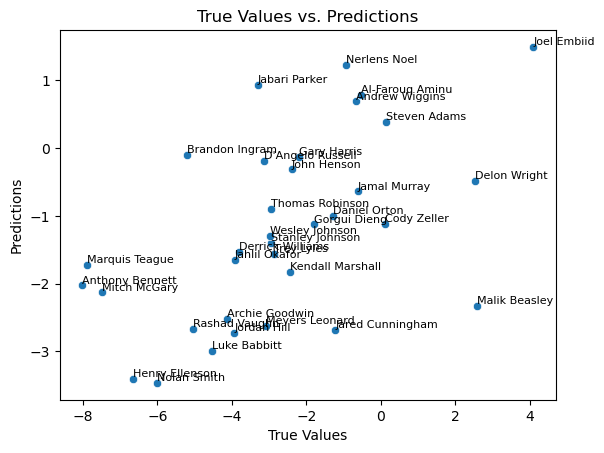

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x=y_test, y=preds)

for i, label in enumerate(y_test.index):  
    plt.text(y_test.iloc[i], preds[i], label, fontsize=8, ha='left', va='bottom')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')

plt.show()